#Assignment 9

Consists of two major parts

1) Training model without using cutoff: Grad cam is used to show the model interpretation 

2) Training model using cutoff: Grad cam is used to show the model interpretation

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 9s 0us/step


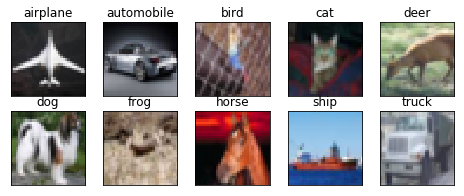

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# train_features = train_features.astype('float32')/255
# test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Changes need to be made to the above network :
1. remove dense

2. add layers required to reach RF

3. fix kernel scaleup and down (1x1)

4. see if all dropouts are properly placed

In [10]:
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(384, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(BatchNormalization())


# model.add(Convolution2D(10,1))
# model.add(Activation('relu'))



model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: Us

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 48)        20784     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 48)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        41568     
__________

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



W0803 07:48:49.016122 139625343600512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Using 90 epochs

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 90, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=90)`
  if sys.path[0] == '':


Epoch 1/90
390/390 [==============================] - 16s 40ms/step - loss: 1.7579 - acc: 0.3511 - val_loss: 1.4741 - val_acc: 0.4784
Epoch 2/90
390/390 [==============================] - 12s 30ms/step - loss: 1.2632 - acc: 0.5667 - val_loss: 1.1068 - val_acc: 0.6138
Epoch 3/90
390/390 [==============================] - 12s 30ms/step - loss: 1.0007 - acc: 0.6663 - val_loss: 0.9601 - val_acc: 0.6731
Epoch 4/90
390/390 [==============================] - 12s 30ms/step - loss: 0.8569 - acc: 0.7149 - val_loss: 0.7987 - val_acc: 0.7258
Epoch 5/90
390/390 [==============================] - 12s 30ms/step - loss: 0.7633 - acc: 0.7452 - val_loss: 0.7708 - val_acc: 0.7423
Epoch 6/90
390/390 [==============================] - 12s 30ms/step - loss: 0.6991 - acc: 0.7682 - val_loss: 0.6993 - val_acc: 0.7606
Epoch 7/90
390/390 [==============================] - 12s 30ms/step - loss: 0.6440 - acc: 0.7849 - val_loss: 0.6197 - val_acc: 0.7921
Epoch 8/90
390/390 [==============================] - 12s 30ms

Model took -20.84 seconds to train


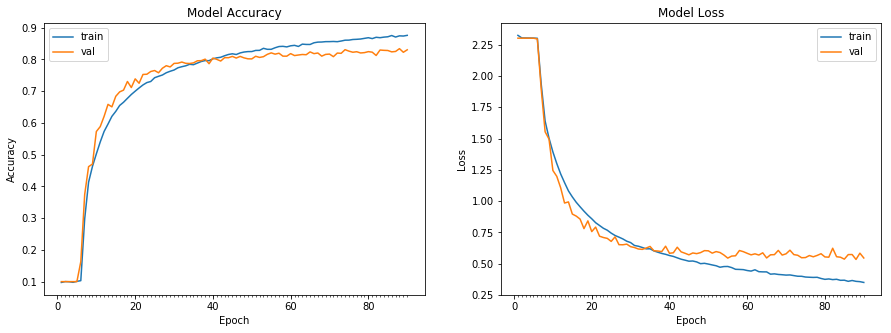

Accuracy on test data is: 82.20


In [0]:
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Got better accuracy than base model with less than 100 epochs

#### Grad cam code

In [0]:
import cv2
def gradcam_heat_map(images,labels,model,last_convo_layer_name,normalized=True):
  #class names present in data set 
  class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
  # convert one hot vector to single values
  labels = [np.where(label==1)[0][0] for label in labels]
  for j in range(0,len(images)):
    
    input_image = images[j]
    
    if not normalized:
      input_image = input_image/255
    image_expanded = np.expand_dims(input_image, axis=0)
    preds = model.predict(image_expanded)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer(last_convo_layer_name)
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([image_expanded])
    for i in range(10):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    img = cv2.resize(input_image,(32,32))
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    heatmap = heatmap/255

    # superimposed_img = cv2.addWeighted(img, 0.75, heatmap, 0.25, 0)
    superimposed_img = 0.75*(img) + 0.25*heatmap
    superimposed_img = superimposed_img

    img_list = [img,heatmap,superimposed_img]
    fig = plt.figure(figsize=(10,3))
    titles = ['Original','Heatmap','Superimposed']
    for i in range(0,3):
      ax = fig.add_subplot(1, 3, 1 + i, xticks=[], yticks=[])
      plt.imshow(img_list[i])
      if j == 0:  
        plt.title(titles[i])
      if i == 0:
        plt.ylabel('class: '+class_names[labels[j]])
    plt.show()
    

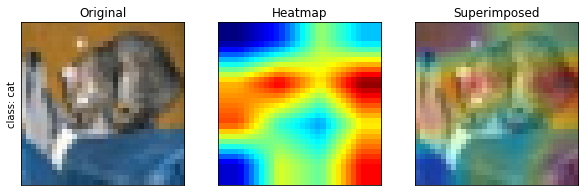

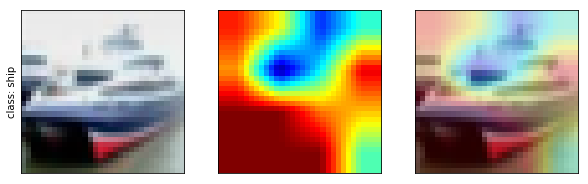

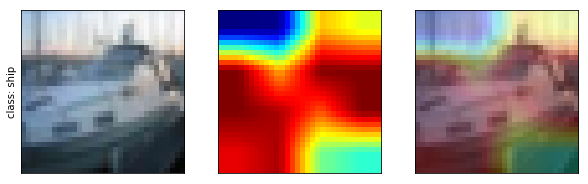

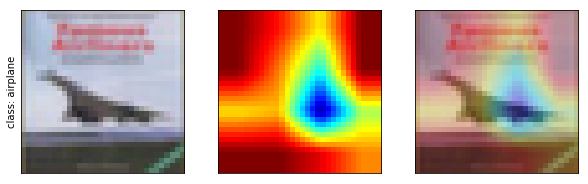

In [0]:
gradcam_heat_map(test_features[0:4],test_labels[0:4],model,model.layers[-5].name)

## Adding Cutoff

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [14]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(),zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 90, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=90)`
  del sys.path[0]
W0803 07:49:22.853577 139625343600512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed 

Epoch 1/90
390/390 [==============================] - 15s 39ms/step - loss: 1.9033 - acc: 0.3143 - val_loss: 1.6380 - val_acc: 0.4336
Epoch 2/90
390/390 [==============================] - 11s 29ms/step - loss: 1.4176 - acc: 0.5140 - val_loss: 1.1874 - val_acc: 0.5983
Epoch 3/90
390/390 [==============================] - 11s 28ms/step - loss: 1.1597 - acc: 0.6130 - val_loss: 0.9382 - val_acc: 0.6909
Epoch 4/90
390/390 [==============================] - 11s 28ms/step - loss: 1.0156 - acc: 0.6614 - val_loss: 0.8721 - val_acc: 0.7098
Epoch 5/90
390/390 [==============================] - 11s 28ms/step - loss: 0.9130 - acc: 0.6957 - val_loss: 0.7839 - val_acc: 0.7398
Epoch 6/90
390/390 [==============================] - 11s 28ms/step - loss: 0.8459 - acc: 0.7166 - val_loss: 0.6878 - val_acc: 0.7720
Epoch 7/90
390/390 [==============================] - 11s 28ms/step - loss: 0.7931 - acc: 0.7329 - val_loss: 0.6675 - val_acc: 0.7764
Epoch 8/90
390/390 [==============================] - 11s 29ms

Model took 1028.28 seconds to train


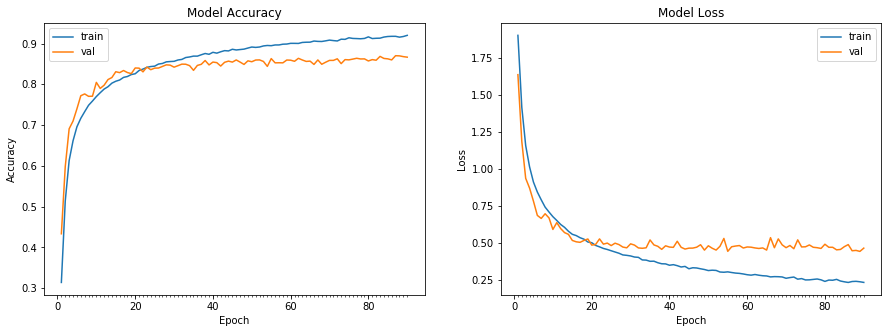

Accuracy on test data is: 86.65


In [15]:
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Obsevartion:

1) If we observe the model trainind without using cutoff and using cutoff, the model trained with cutoff performs better in the later stages
2) Adding cutoff to the images will act as regularization and hence improves the accuracy of the model.

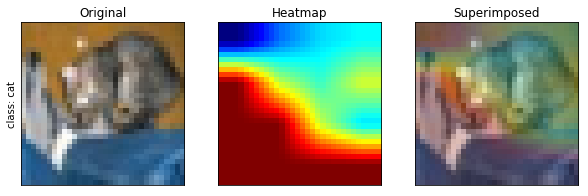

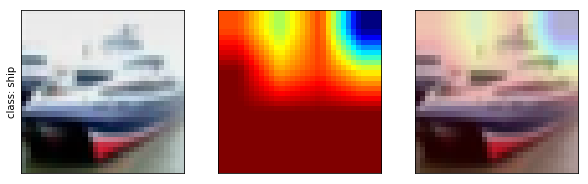

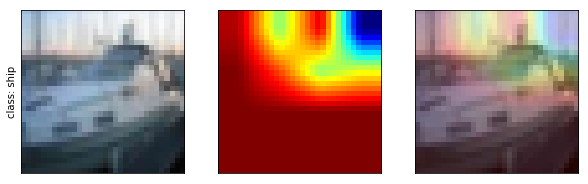

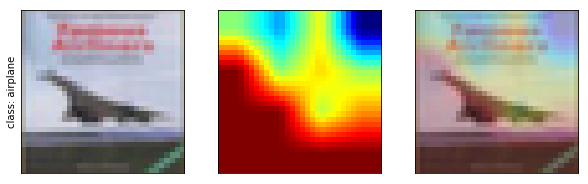

In [16]:
gradcam_heat_map(test_features[0:4],test_labels[0:4],model,model.layers[-5].name,normalized=False)